# Red Wine Quality Analysis - Python

Predicting the Quality of Red Wine using Machine Learning Algorithms for Regression Analysis, Data Visualizations and Data Analysis.

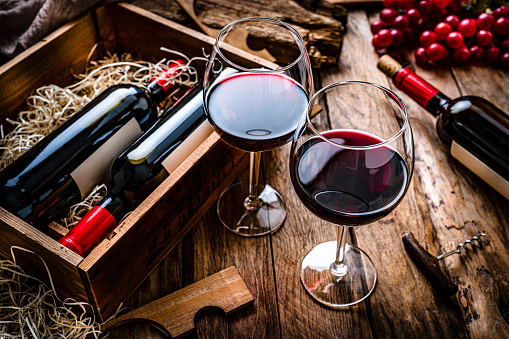

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
wine = pd.read_csv("wineQualityReds.csv")
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Description of attributes:**

1. **Fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. **residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. **chlorides**: the amount of salt in the wine
6. **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. **density**: the density of water is close to that of water depending on the percent alcohol and sugar content
9. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. **alcohol**: the percent alcohol content of the wine

 `Output variable (based on sensory data):` 
12. **quality** (score between 0 and 10)

## Data Exploration

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


Their is not null value in our dataset

In [4]:
wine.shape

(1599, 13)

In [5]:
wine.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
* All the data seems to be in range.

In [6]:
wine.nunique()

Unnamed: 0              1599
fixed.acidity             96
volatile.acidity         143
citric.acid               80
residual.sugar            91
chlorides                153
free.sulfur.dioxide       60
total.sulfur.dioxide     144
density                  436
pH                        89
sulphates                 96
alcohol                   65
quality                    6
dtype: int64

## Exploratory Data Analysis (EDA)

Check data distribution in quality column 

In [7]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

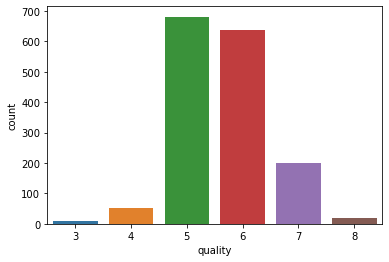

In [8]:
sns.countplot(wine['quality'])

* The above distribution shows the range for response variable (quality) is between 3 to 8.
* Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable. i.e.
   1. bad: 1-4
   2. average: 5-6
   3. good: 7-10

In [9]:
conditions = [(wine['quality'] >= 7),
              (wine['quality'] <= 4)]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [10]:
wine.groupby('rating').mean()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,,
average,792.984079,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,837.650794,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,831.714286,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


check the corelation between the target variable and predictor variables

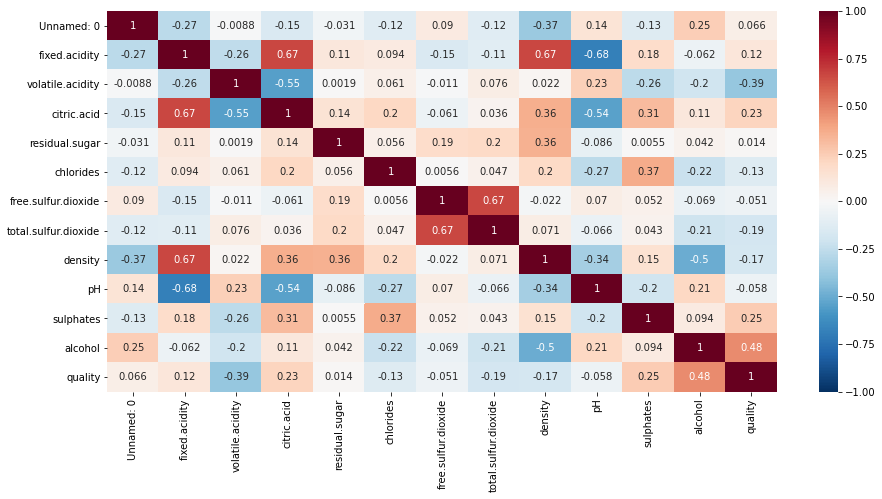

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(data= wine.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [12]:
a = wine.corr()
a['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric.acid             0.226373
fixed.acidity           0.124052
Unnamed: 0              0.066453
residual.sugar          0.013732
free.sulfur.dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total.sulfur.dioxide   -0.185100
volatile.acidity       -0.390558
Name: quality, dtype: float64

* We can observe that, the 'alcohol, sulphates, citric acid & fixed acidity' have maximum corelation with response variable 'quality'.
* This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

### Analysis of alcohol percentage with wine quality:

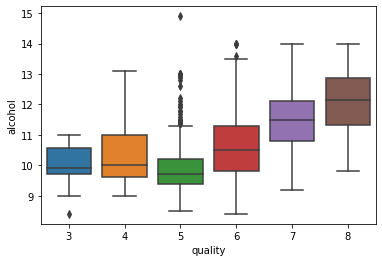

In [13]:
sns.boxplot(x="quality", y='alcohol', data = wine)
plt.show()

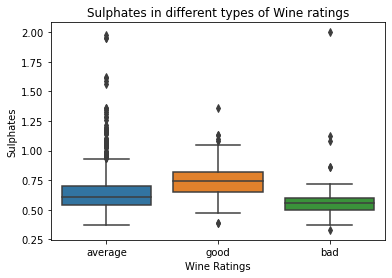

In [14]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')
plt.show()

### Analysis of Citric Acid & wine ratings:

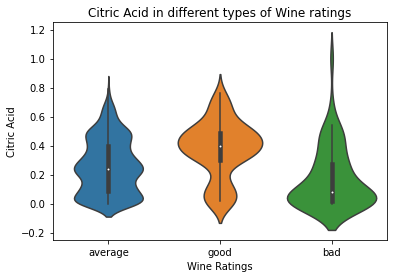

In [15]:
bx= sns.violinplot(x= "rating", y= "citric.acid", data= wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric Acid in different types of Wine ratings')
plt.show()

### Analysis of fixed acidity & wine ratings:



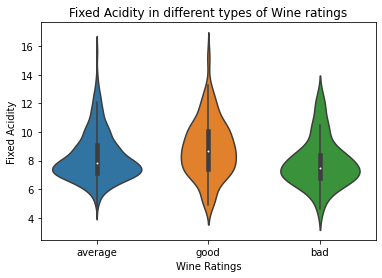

In [16]:
bx = sns.violinplot(x="rating", y='fixed.acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')
plt.show()

### Analysis of pH & wine ratings:



C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


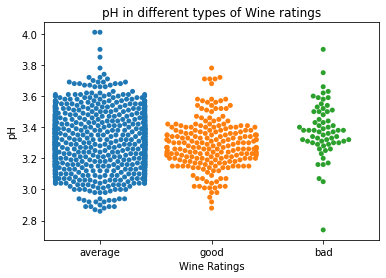

In [17]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')
plt.show()

* Use lmplot for different quality ratings shows a linear regression between residual_sugar & alcohol in red wine



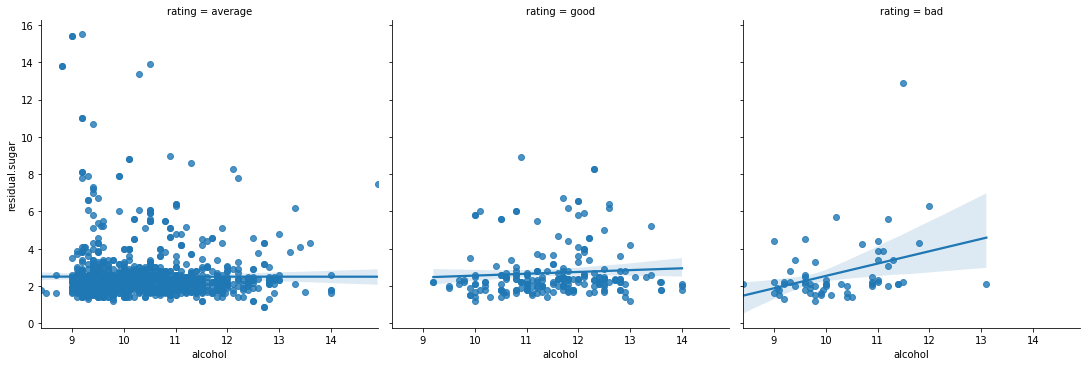

In [19]:
sns.lmplot(x = "alcohol", y = "residual.sugar", col = "rating", data = wine)
plt.show()

* The linear regression plots above for different wine quality ratings (bad, average & good) shows the **regression** between **alcohol** and **residual sugar content** of the red wine.
* We can observe from the trendline that, **for good and average wine** types the **residual sugar content remains almost constant irrespective of alcohol content value**. Whereas for **bad quality wine**, the **residual sugar content increases gradually** with the increase in alcohol content.
* This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.

### Data Cleaning and Preprocessing

In [21]:
#Change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

wine["rating"]= le.fit_transform(wine["rating"])
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rating
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [23]:
wine.rating.unique()

array([0, 2, 1])

* We observed that rating 0 = average, 1= good & 2= bad.

## Split Data Into Train and Test

In [25]:
X = wine.iloc[:,:-2]   #Independent variable
y = wine['rating']      # Dependent variable
X.head(10)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [26]:
y.head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    2
8    2
9    0
Name: rating, dtype: int32

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-1.73096794 -0.52835961  0.96187667 ...  1.28864292 -0.57920652
  -0.96024611]
 [-1.72880152 -0.29854743  1.96744245 ... -0.7199333   0.1289504
  -0.58477711]
 [-1.7266351  -0.29854743  1.29706527 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [ 1.7266351  -1.1603431  -0.09955388 ...  0.70550789  0.54204194
   0.54162988]
 [ 1.72880152 -1.39015528  0.65462046 ...  1.6773996   0.30598963
  -0.20930812]
 [ 1.73096794 -1.33270223 -1.21684919 ...  0.51112954  0.01092425
   0.54162988]]


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 12)
(1199,)
(400, 12)
(400,)


## Model Building- Logistic Regression


In [30]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")
y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[325   0  14]
 [ 16   0   0]
 [ 28   0  17]]
accuracy is:-  85.5
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       339
           1       0.00      0.00      0.00        16
           2       0.55      0.38      0.45        45

    accuracy                           0.85       400
   macro avg       0.48      0.45      0.46       400
weighted avg       0.81      0.85      0.83       400



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision tree


In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[287   8  44]
 [ 12   2   2]
 [ 16   1  28]]
accuracy:-  79.25
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       339
           1       0.18      0.12      0.15        16
           2       0.38      0.62      0.47        45

    accuracy                           0.79       400
   macro avg       0.49      0.53      0.50       400
weighted avg       0.82      0.79      0.80       400



## Random Forest Classifier


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[326   1  12]
 [ 16   0   0]
 [ 19   0  26]]
accuracy:-  88.0
Classification Report:-
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       339
           1       0.00      0.00      0.00        16
           2       0.68      0.58      0.63        45

    accuracy                           0.88       400
   macro avg       0.53      0.51      0.52       400
weighted avg       0.84      0.88      0.86       400



## Support Vector Machine


In [33]:
from sklearn.svm import SVC
svc= SVC()

svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")

y_pred = svc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[333   0   6]
 [ 16   0   0]
 [ 30   0  15]]
accuracy:-  87.0
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       339
           1       0.00      0.00      0.00        16
           2       0.71      0.33      0.45        45

    accuracy                           0.87       400
   macro avg       0.53      0.44      0.46       400
weighted avg       0.82      0.87      0.84       400



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K Nearest Neighbors Classifier


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[318   2  19]
 [ 15   0   1]
 [ 25   0  20]]
accuracy:-  84.5
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       339
           1       0.00      0.00      0.00        16
           2       0.50      0.44      0.47        45

    accuracy                           0.84       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.81      0.84      0.83       400



## Ada Boost Classifier


In [35]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[263  26  50]
 [ 13   3   0]
 [ 14   0  31]]
accuracy:-  74.25
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       339
           1       0.10      0.19      0.13        16
           2       0.38      0.69      0.49        45

    accuracy                           0.74       400
   macro avg       0.46      0.55      0.49       400
weighted avg       0.82      0.74      0.77       400



## Naive Bayes


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[271  14  12]
 [ 10   1   0]
 [ 58   1  33]]
accuracy:-  76.25
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       339
           1       0.09      0.06      0.07        16
           2       0.36      0.73      0.48        45

    accuracy                           0.76       400
   macro avg       0.45      0.53      0.47       400
weighted avg       0.82      0.76      0.78       400



### Result:-
1. Accuracy of Logistic Regression :- **85.5 %**
2. Accuracy of Decision Tree :- **80.25 %**
3. Accuracy of Random Forest Classifier :- **88.75 %**
4. Accuracy of Support Vecor Machine :- **87 %**
5. Accuracy of K Nearest Neighbors Classifier :- **84.75%**
6. Accuracy of Ada Boost Classifier :- **79.5 %**
7. Accuracy of Naive Bayes :- **76.25 %**

## Testing Model


In [37]:
a= np.array(y_test)
predicted = np.array(rfc.predict(X_test))
df=pd.DataFrame({"original":a, "predcted": predicted}, index= range(len(a)))
df.head(50)

,original,predcted
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


## Conclusion
We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor **'quality' was not very helpful** and to overcome this, so we created another variable called **'rating'**.
To make predictions of wine quality and any other if required, we trained following models **'LogisticRegression'**,**'DecisionTree'**, **'RandomForestClassifier'**, **'Support Vector Classifier'**, **'KNearestNeighbors'**, **'AdaBoostClassifier'**,**'GaussianNB'**. The **Random Forest Classifier performed better** its accuracy is 88.75% and we decided to stick with it.
The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.
# Model Created Successfully !